In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape # 数据的维度

(100, 3)

Text(0, 0.5, 'Exam 2 Score')

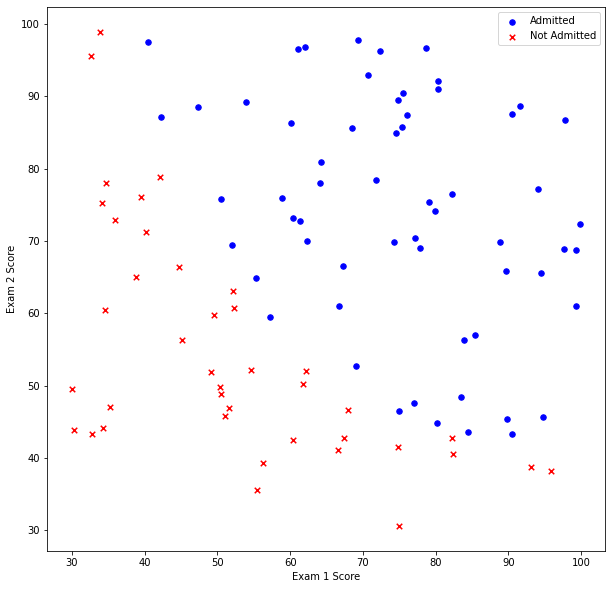

In [4]:
# 返回 Admitted 列为 1的的 rows
positive = pdData[pdData['Admitted'] == 1] # returns the subset of rows such Admitted = 1, i.e. the set of *positive* examples
#print('----------positive----')
#print(positive)
negative = pdData[pdData['Admitted'] == 0] # returns the subset of rows such Admitted = 0, i.e. the set of *negative* examples

fig, ax = plt.subplots(figsize=(10,10)) # figsize指定画图的长和宽
# scatter散点图
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


目标：建立分类器（求解出三个参数 $\theta_0         \theta_1         \theta_2 $）


设定阈值，根据阈值判断录取结果

### 要完成的模块
-  `sigmoid` : 映射到概率的函数

-  `model` : 返回预测结果值

-  `cost` : 根据参数计算损失

-  `gradient` : 计算每个参数的梯度方向

-  `descent` : 进行参数更新

-  `accuracy`: 计算精度

###  `sigmoid` 函数

$$
g(z) = \frac{1}{1+e^{-z}}   
$$

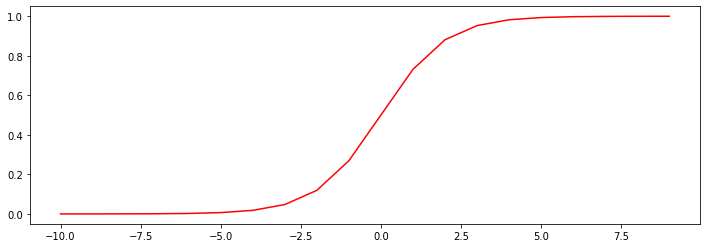

In [5]:
# 将 负无穷到正无穷的值 映射到[-1,1]
def sigmoid(z):
    return 1/(1+np.exp(-z))

nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')



### Sigmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$


$$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\
x_{1}\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$$

In [6]:
def model(X, theta):
    
    return sigmoid(np.dot(X, theta.T)) # 矩阵的乘法




pdData.insert(0, 'Ones', 1) # in a try / except structure so as not to return an error if the block si executed several times
pdData.head
#dir(pdData)
# set X (training data) and y (target variable)
orig_data = pdData # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]

# # convert to numpy arrays and initalize the parameter array theta
# #X = np.matrix(X.values)
# #y = np.matrix(data.iloc[:,3:4].values) #np.array(y.values)
# theta = np.zeros([1, 3])

TypeError: '(slice(None, None, None), slice(0, 3, None))' is an invalid key